In [2]:
%matplotlib inline
import sys
sys.path.append("..")

In [3]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [4]:
# load the file from the experiments directories

prog = re.compile("Epoch: (?P<epoch>\d+)/\d+ \| Train \[Task: (?P<train_tl>\d+.\d+) Prune: (?P<train_ml>\d+.\d+) KD: (?P<train_kdl>\d+.\d+)\] Acc: (?P<train_acc>\d+.\d+)\% \| Eval Acc: (?P<eval_acc>\d+.\d+)\%")
#Group `epoch`
#Group `train_tl`
#Group `train_ml`
#Group `train_kdl`
#Group `train_acc`
#Group `eval_acc`

prog2 = re.compile("Pruned -?\d+.\d+ parameters, from \d+.\d+ to (?P<params>\d+.\d+)")
#Group `params`

df = pd.DataFrame({})
fpath = os.path.join(
    "..",
    "experiments",
    "calzone_old",
    "cifar100-joint-scheduled-prune-vgg19bn",
    "logs",
    "exp_debug.log"
)

dd = {}
with open(fpath, "r") as logf:
    for line in logf:
        match = prog.search(line)
        if match:
            dd["Epoch"] = dd.get("Epoch", []) + [int(match.group("epoch"))]
            dd["Train Task Loss"] = dd.get("Train Task Loss", []) + [float(match.group("train_tl"))]
            dd["Train KD Loss"] = dd.get("Train KD Loss", []) + [float(match.group("train_kdl"))]
            dd["Train Mask Loss"] = dd.get("Train Mask Loss", []) + [float(match.group("train_ml"))]
            dd["Train Acc"] = dd.get("Train Acc", []) + [float(match.group("train_acc"))]
            dd["Eval Acc"] = dd.get("Eval Acc", []) + [float(match.group("eval_acc"))]
        match = prog2.search(line)
        if match:
            dd["Params"] = dd.get("Params", []) + [float(match.group("params"))]
            

# concat the dataframe
df = pd.concat([df, pd.DataFrame(dd)])

In [5]:
print(df)


     Epoch  Train Task Loss  Train KD Loss  Train Mask Loss  Train Acc  \
0        0            3.841          2.452            4.478      98.92   
1        1            4.924          3.261        30676.127      98.54   
2        2           18.310          7.799         8510.805      94.49   
3        3           41.473         14.242         4388.993      87.96   
4        4           62.903         20.306         2818.324      82.02   
..     ...              ...            ...              ...        ...   
159    159          219.846         60.444            9.375      44.62   
160    160          224.778         61.588            8.400      44.00   
161    161          240.105         64.553            7.707      40.85   
162    162          285.676         73.051            7.176      32.43   
163    163          454.815        113.531            1.342       2.64   

     Eval Acc      Params  
0       70.55  19524870.0  
1       69.58  16287615.0  
2       66.73  14555475.0  

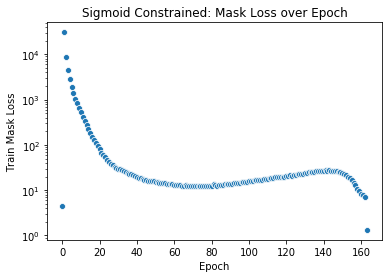

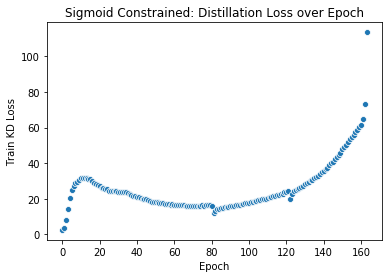

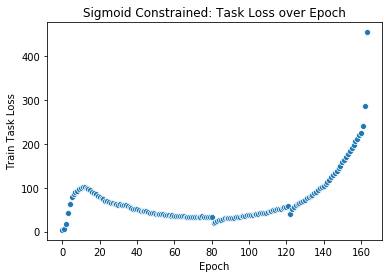

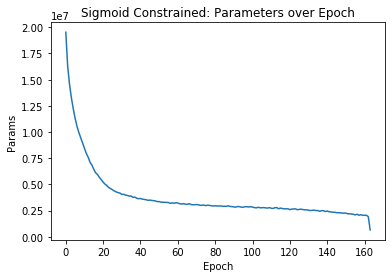

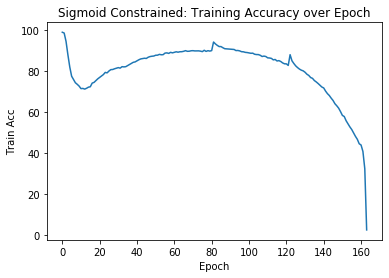

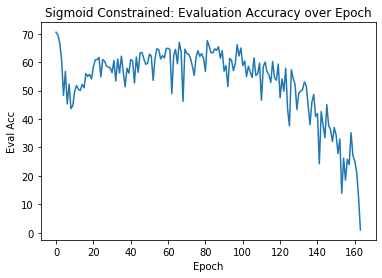

In [10]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


ml = sns.scatterplot(
    x="Epoch", y="Train Mask Loss", data=df
)
ml.set(title="Sigmoid Constrained: Mask Loss over Epoch")
ml.set_yscale("log")
plt.savefig("sig-constrained_pruning-train_mask_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


kdl = sns.scatterplot(
    x="Epoch", y="Train KD Loss", data=df, legend=False
)
kdl.set(title="Sigmoid Constrained: Distillation Loss over Epoch")
plt.savefig("sig-constrained_pruning-train_kd_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


tl = sns.scatterplot(
    x="Epoch", y="Train Task Loss", data=df, legend=False
)
tl.set(title="Sigmoid Constrained: Task Loss over Epoch")
plt.savefig("sig-constrained_pruning-train_task_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


pm = sns.lineplot(
    x="Epoch", y="Params", data=df
)
pm.set(title="Sigmoid Constrained: Parameters over Epoch")
plt.savefig("sig-constrained_pruning-unmasked_parameters-cifar100-vgg19_bn.png", dpi=200)
plt.show()

ta = sns.lineplot(
    x="Epoch", y="Train Acc", data=df, legend=False
)
ta.set(title="Sigmoid Constrained: Training Accuracy over Epoch")
plt.savefig("sig-constrained_pruning-train_acc-cifar100-vgg19_bn.png", dpi=200)
plt.show()


ea = sns.lineplot(
    x="Epoch", y="Eval Acc", data=df, legend=False
)
ea.set(title="Sigmoid Constrained: Evaluation Accuracy over Epoch")
plt.savefig("sig-constrained_pruning-eval_acc-cifar100-vgg19_bn.png", dpi=200)
plt.show()


# ta = sns.relplot(
#     x="Epoch", y="Train Acc", hue="Mask Reg", data=df,
#     col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
#     col="LR", facet_kws=dict(sharex=False, sharey=False),
# )
# plt.show()
# ea = sns.relplot(
#     x="Epoch", y="Eval Acc", hue="Mask Reg", data=df,
#     col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
#     col="LR", facet_kws=dict(sharex=False, sharey=False),
# )
# g.set_yscale("log")
# plt.savefig("eval_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()